In [39]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision.transforms as transforms
from torch import optim
from torch.autograd import Variable
from torchvision import datasets
import matplotlib.pyplot as plt
import numpy as np
from random import randint

In [30]:
class CNN(nn.Module):
  """ 
  Implements a Convolutional Neural Network for Classification
    ZEROPAD2D -> CONV2D -> BATCHNORM -> RELU -> MAXPOOL -> FLATTEN -> DENSE
  """
  def __init__(self):
    super(CNN, self).__init__()
    self.conv1 = nn.Sequential(
        #input image shape 28x28x1 and apply convolutional layer with same padding
        nn.Conv2d(in_channels=3,out_channels=8,kernel_size=5,stride=1,padding=2),
        #new shape 28x28x8
        nn.ReLU(),
        #new shape 14x14x8
        nn.MaxPool2d(kernel_size=2),
    )
    self.conv2 = nn.Sequential(
        # input shape 14x14x8
        nn.Conv2d(8, 32, 5, 1, 2),
        # new shape 14x14x32
        nn.ReLU(),
        # 7x7x32
        nn.MaxPool2d(2),
    )
    self.out = nn.Linear(32 * 8 * 8, 10)
  def forward(self, x):
    #print(f"The input shape is {x.shape}")
    x = self.conv1(x)
    #print(f"The shape after the first conv layer {x.shape}")
    x = self.conv2(x)
    #print(f"The shape after the second conv layer {x.shape}")
    # flatten the output of conv2 to (batch_size, 32 * 7 * 7)
    x = x.view(x.size(0), -1)
    #print(f"The shape after flatening {x.shape}")
    output = self.out(x)
    return output

  def train_model(self, num_epochs, train_loader, lr):
    self.train()
    optimizer = optim.SGD(self.parameters(), lr=lr)
    loss_function = nn.CrossEntropyLoss()
    total_step = len(train_loader)
    for epoch in range(num_epochs):
        for i, (images, labels) in enumerate(train_loader):
            images = images.to(device)
            labels = labels.to(device)
            #compute the forward pass
            output = self(images)
            #compute the loss
            loss = loss_function(output, labels)
            # clear gradients for this training step
            optimizer.zero_grad()
            # backpropagation, compute gradients
            loss.backward()
            # apply gradients
            optimizer.step()

            if (i+1) % 100 == 0:
                print ('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}'
                      .format(epoch + 1, num_epochs, i + 1, total_step, loss.item()))
                
  def test_model(self, test_loader):
    self.eval()
    predictions = []
    labels_list = []
    with torch.no_grad():
      for images, labels in test_loader:
          images = images.to(device)
          labels = labels.to(device)
          
          # Forward pass to get output/logits
          outputs = self(images)
          
          # Predictions are the maximum value locations in logits dimension
          _, predicted = torch.max(outputs.data, 1)
          
          # Collect the predictions and labels
          predictions.extend(predicted.cpu().numpy())
          labels_list.extend(labels.cpu().numpy())
    correct = (np.array(predictions) == np.array(labels_list)).sum()
    total = len(labels_list)
    accuracy = correct / total
    print(f'Accuracy of the network on the test images: {accuracy * 100:.2f}%') 

In [24]:
#normalization
transform1 = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))  # Adjusted for one channel
])

#Load Data:
# train_data = datasets.MNIST(root = 'data', train = True, transform = transforms.ToTensor(),download = True)
# test_data = datasets.MNIST(root = 'data', train = False,transform = transforms.ToTensor())

train_data_norm = datasets.CIFAR10(root = 'data', train = True, transform = transform1,download = True)
test_data_norm = datasets.CIFAR10(root = 'data', train = False,transform = transform1)

# Define sizes for split
num_train = len(train_data)
num_val = int(0.2 * num_train)  # Let's use 20% of the training data for validation
num_train = num_train - num_val

# Split the data into train and validation sets
train_data, val_data = torch.utils.data.random_split(train_data, [num_train, num_val])




print("The size of the train data", train_data_norm.data.shape)
print("The size of the test data", test_data_norm.data.shape)



Files already downloaded and verified
The size of the train data (50000, 32, 32, 3)
The size of the test data (10000, 32, 32, 3)


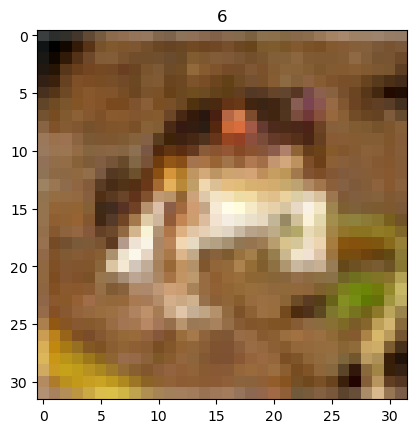

In [25]:
#display one of the training examples and its label
plt.imshow(train_data_norm.data[0], cmap='gray')
plt.title('%i' % train_data_norm.targets[0])
plt.show()

In [31]:
# Parameters
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
batch_size = 200
learning_rate_1 = .01
learning_rate_2 = .001
num_epochs = 10


#initialize dataLoader Objects
train_loader_norm = torch.utils.data.DataLoader(train_data_norm,batch_size=batch_size,shuffle=True,num_workers=1)
test_loader_norm = torch.utils.data.DataLoader(test_data_norm,batch_size=batch_size,shuffle=True,num_workers=1)
#initialize and train model
model = CNN()
model.to(device)
model.train_model(num_epochs, train_loader_norm, learning_rate_1)

Epoch [1/10], Step [100/250], Loss: 2.1217
Epoch [1/10], Step [200/250], Loss: 2.0291
Epoch [2/10], Step [100/250], Loss: 1.8560
Epoch [2/10], Step [200/250], Loss: 1.8091
Epoch [3/10], Step [100/250], Loss: 1.7451
Epoch [3/10], Step [200/250], Loss: 1.7052
Epoch [4/10], Step [100/250], Loss: 1.6973
Epoch [4/10], Step [200/250], Loss: 1.4815
Epoch [5/10], Step [100/250], Loss: 1.4741
Epoch [5/10], Step [200/250], Loss: 1.4867
Epoch [6/10], Step [100/250], Loss: 1.3532
Epoch [6/10], Step [200/250], Loss: 1.4092
Epoch [7/10], Step [100/250], Loss: 1.4992
Epoch [7/10], Step [200/250], Loss: 1.3323
Epoch [8/10], Step [100/250], Loss: 1.4404
Epoch [8/10], Step [200/250], Loss: 1.3365
Epoch [9/10], Step [100/250], Loss: 1.3571
Epoch [9/10], Step [200/250], Loss: 1.3375
Epoch [10/10], Step [100/250], Loss: 1.3129
Epoch [10/10], Step [200/250], Loss: 1.3178


In [32]:
#test model
model.test_model(test_loader_norm)

Accuracy of the network on the test images: 53.11%


## Results

- The initial architecture is the same as the one used on MNIST with the input channels of the first layer and dense layers updated for larger image size. After 10 epochs the loss is 1.31 with a downwar trend. The accuracy is 53.11%
## Analysis

- The model is not learning enough. I will increase the number of parameters to better fit the training data by dowbling the number of chanels at each conv layer.

In [48]:
class CNN(nn.Module):
  """ 
  Implements a Convolutional Neural Network for Classification
    ZEROPAD2D -> CONV2D -> BATCHNORM -> RELU -> MAXPOOL -> FLATTEN -> DENSE
  """
  def __init__(self):
    super(CNN, self).__init__()
    self.conv1 = nn.Sequential(
        #input image shape 28x28x3 and apply convolutional layer with same padding
        nn.Conv2d(in_channels=3,out_channels=16,kernel_size=5,stride=1,padding=2),
        #new shape 28x28x16
        nn.ReLU(),
        #new shape 14x14x16
        nn.MaxPool2d(kernel_size=2),
    )
    self.conv2 = nn.Sequential(
        # input shape 14x14x16
        nn.Conv2d(16, 32, 5, 1, 2),
        # new shape 14x14x32
        nn.ReLU(),
        # 7x7x32
        nn.MaxPool2d(2),
    )
    self.out = nn.Linear(32* 8 * 8, 10)
  def forward(self, x):
    #print(f"The input shape is {x.shape}")
    x = self.conv1(x)
    #print(f"The shape after the first conv layer {x.shape}")
    x = self.conv2(x)
    #print(f"The shape after the third conv layer {x.shape}")
    # flatten the output of conv2 to (batch_size, 32 * 7 * 7)
    x = x.view(x.size(0), -1)
    #print(f"The shape after flatening {x.shape}")
    output = self.out(x)
    return output

  def train_model(self, num_epochs, train_loader, lr):
    self.train()
    optimizer = optim.SGD(self.parameters(), lr=lr)
    loss_function = nn.CrossEntropyLoss()
    total_step = len(train_loader)
    for epoch in range(num_epochs):
        for i, (images, labels) in enumerate(train_loader):
            images = images.to(device)
            labels = labels.to(device)
            #compute the forward pass
            output = self(images)
            #compute the loss
            loss = loss_function(output, labels)
            # clear gradients for this training step
            optimizer.zero_grad()
            # backpropagation, compute gradients
            loss.backward()
            # apply gradients
            optimizer.step()

            if (i+1) % 100 == 0:
                print ('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}'
                      .format(epoch + 1, num_epochs, i + 1, total_step, loss.item()))
                
  def test_model(self, test_loader):
    self.eval()
    predictions = []
    labels_list = []
    with torch.no_grad():
      for images, labels in test_loader:
          images = images.to(device)
          labels = labels.to(device)
          
          # Forward pass to get output/logits
          outputs = self(images)
          
          # Predictions are the maximum value locations in logits dimension
          _, predicted = torch.max(outputs.data, 1)
          
          # Collect the predictions and labels
          predictions.extend(predicted.cpu().numpy())
          labels_list.extend(labels.cpu().numpy())
    correct = (np.array(predictions) == np.array(labels_list)).sum()
    total = len(labels_list)
    accuracy = correct / total
    print(f'Accuracy of the network on the test images: {accuracy * 100:.2f}%') 

In [49]:
# Parameters
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
batch_size = 200
learning_rate_1 = .01
learning_rate_2 = .001
num_epochs = 10

#initialize dataLoader Objects
train_loader_norm = torch.utils.data.DataLoader(train_data_norm,batch_size=batch_size,shuffle=True,num_workers=1)
test_loader_norm = torch.utils.data.DataLoader(test_data_norm,batch_size=batch_size,shuffle=True,num_workers=1)

#initialize and train model
model = CNN()
model.to(device)
model.train_model(num_epochs, train_loader_norm, learning_rate_1)

Epoch [1/10], Step [100/250], Loss: 2.1680
Epoch [1/10], Step [200/250], Loss: 1.9632
Epoch [2/10], Step [100/250], Loss: 1.9248
Epoch [2/10], Step [200/250], Loss: 1.7721
Epoch [3/10], Step [100/250], Loss: 1.7087
Epoch [3/10], Step [200/250], Loss: 1.6420
Epoch [4/10], Step [100/250], Loss: 1.5856
Epoch [4/10], Step [200/250], Loss: 1.5278
Epoch [5/10], Step [100/250], Loss: 1.4903
Epoch [5/10], Step [200/250], Loss: 1.5784
Epoch [6/10], Step [100/250], Loss: 1.4299
Epoch [6/10], Step [200/250], Loss: 1.5672
Epoch [7/10], Step [100/250], Loss: 1.2949
Epoch [7/10], Step [200/250], Loss: 1.3648
Epoch [8/10], Step [100/250], Loss: 1.2876
Epoch [8/10], Step [200/250], Loss: 1.3680
Epoch [9/10], Step [100/250], Loss: 1.4088
Epoch [9/10], Step [200/250], Loss: 1.3944
Epoch [10/10], Step [100/250], Loss: 1.3652
Epoch [10/10], Step [200/250], Loss: 1.2251


In [50]:
#test model
model.test_model(test_loader_norm)

Accuracy of the network on the test images: 54.44%


## Results

- Doubling the number of output channels lowered the loss slightly to 1.22 and the accuracy went up to 54.8%. 
## Analysis

- Not much improvement was found by doubling the number of channels. The model is still not learning enough. I will add a third conv block with a conv layer, relu, conv layer. 
- Changed the filters to collapse the images faster and added more channels
- Added momentum to help GSD make progress. Loss was not progressing without it.

In [78]:
class CNN(nn.Module):
  """ 
  Implements a Convolutional Neural Network for Classification
    ZEROPAD2D -> CONV2D -> BATCHNORM -> RELU -> MAXPOOL -> FLATTEN -> DENSE
  """
  def __init__(self):
    super(CNN, self).__init__()
    self.conv1 = nn.Sequential(
        #input image shape 28x28x3 and apply convolutional layer with same padding
        nn.Conv2d(in_channels=3,out_channels=32,kernel_size=3,stride=1,padding=1),
        #new shape 28x28x32
        nn.ReLU(),
        #new shape 16x16x32
        nn.MaxPool2d(kernel_size=2),
    )
    self.conv2 = nn.Sequential(
        # input shape 14x14x32
        nn.Conv2d(32, 64, 2, 2, 1),
        # new shape 14x14x32
        nn.ReLU(),
        # 7x7x64
        nn.MaxPool2d(2),
    )
    self.conv3 = nn.Sequential(
        # input shape 7x7x64
        nn.Conv2d(64, 128, 5, 1, 1),
        # new shape 7x7x128
        nn.ReLU(),
        # 3x3x128
        nn.MaxPool2d(2),
    )
    self.fc1 = nn.Linear(128, 256)
    self.out = nn.Linear(256, 10)
  def forward(self, x):
    #print(f"The input shape is {x.shape}")
    x = self.conv1(x)
    #print(f"The shape after the first conv layer {x.shape}")
    x = self.conv2(x)
    #print(f"The shape after the second conv layer {x.shape}")
    x = self.conv3(x)
    #print(f"The shape after the third conv layer {x.shape}")
    # flatten the output of conv2 to (batch_size, 32 * 7 * 7)
    x = x.view(x.size(0), -1)
    #print(f"The shape after flatening {x.shape}")
    x = F.relu(self.fc1(x))
    #print(f"The shape after linear {x.shape}")
    output = self.out(x)
    return output

  def train_model(self, num_epochs, train_loader, lr):
    self.train()
    optimizer = optim.SGD(self.parameters(), lr=lr, momentum=0.9)
    loss_function = nn.CrossEntropyLoss()
    total_step = len(train_loader)
    for epoch in range(num_epochs):
        for i, (images, labels) in enumerate(train_loader):
            images = images.to(device)
            labels = labels.to(device)
            #compute the forward pass
            output = self(images)
            #compute the loss
            loss = loss_function(output, labels)
            # clear gradients for this training step
            optimizer.zero_grad()
            # backpropagation, compute gradients
            loss.backward()
            # apply gradients
            optimizer.step()

            if (i+1) % 100 == 0:
                print ('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}'
                      .format(epoch + 1, num_epochs, i + 1, total_step, loss.item()))
                
  def test_model(self, test_loader):
    self.eval()
    predictions = []
    labels_list = []
    with torch.no_grad():
      for images, labels in test_loader:
          images = images.to(device)
          labels = labels.to(device)
          
          # Forward pass to get output/logits
          outputs = self(images)
          
          # Predictions are the maximum value locations in logits dimension
          _, predicted = torch.max(outputs.data, 1)
          
          # Collect the predictions and labels
          predictions.extend(predicted.cpu().numpy())
          labels_list.extend(labels.cpu().numpy())
    correct = (np.array(predictions) == np.array(labels_list)).sum()
    total = len(labels_list)
    accuracy = correct / total
    print(f'Accuracy of the network on the test images: {accuracy * 100:.2f}%') 

In [79]:
# Parameters
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
batch_size = 200
learning_rate_1 = .01
learning_rate_2 = .001
num_epochs = 10

#initialize dataLoader Objects
train_loader_norm = torch.utils.data.DataLoader(train_data_norm,batch_size=batch_size,shuffle=True,num_workers=1)
test_loader_norm = torch.utils.data.DataLoader(test_data_norm,batch_size=batch_size,shuffle=True,num_workers=1)

#initialize and train model
model = CNN()
model.to(device)
model.train_model(num_epochs, train_loader_norm, learning_rate_1)

Epoch [1/10], Step [100/250], Loss: 2.1964
Epoch [1/10], Step [200/250], Loss: 1.9447
Epoch [2/10], Step [100/250], Loss: 1.6762
Epoch [2/10], Step [200/250], Loss: 1.6300
Epoch [3/10], Step [100/250], Loss: 1.4586
Epoch [3/10], Step [200/250], Loss: 1.3669
Epoch [4/10], Step [100/250], Loss: 1.2604
Epoch [4/10], Step [200/250], Loss: 1.1511
Epoch [5/10], Step [100/250], Loss: 1.0764
Epoch [5/10], Step [200/250], Loss: 1.1905
Epoch [6/10], Step [100/250], Loss: 1.0249
Epoch [6/10], Step [200/250], Loss: 1.0513
Epoch [7/10], Step [100/250], Loss: 0.9417
Epoch [7/10], Step [200/250], Loss: 0.9679
Epoch [8/10], Step [100/250], Loss: 0.9305
Epoch [8/10], Step [200/250], Loss: 0.7323
Epoch [9/10], Step [100/250], Loss: 0.7423
Epoch [9/10], Step [200/250], Loss: 0.9601
Epoch [10/10], Step [100/250], Loss: 0.7352
Epoch [10/10], Step [200/250], Loss: 0.7977


In [80]:
#test model
model.test_model(test_loader_norm)

Accuracy of the network on the test images: 68.93%


## Results

- The changes improved the performance tremendously to 68.93% accuracy.
## Analysis
- The model needs to train for longer. I will add learning rate decay and train for 10 epochs and assess the performance.
- I may also add batch normalization if I notice that the variance between the loss of the batches is too high.


The input shape is torch.Size([200, 3, 32, 32])
The shape after the first conv layer torch.Size([200, 32, 16, 16])
The shape after the second conv layer torch.Size([200, 64, 4, 4])
The shape after the third conv layer torch.Size([200, 128, 1, 1])
The shape after flatening torch.Size([200, 128])

In [110]:
class CNN(nn.Module):
  """ 
  Implements a Convolutional Neural Network for Classification
    ZEROPAD2D -> CONV2D -> BATCHNORM -> RELU -> MAXPOOL -> FLATTEN -> DENSE
  """
  def __init__(self):
    super(CNN, self).__init__()
    self.conv1 = nn.Sequential(
        #input image shape 28x28x3 and apply convolutional layer with same padding
        nn.Conv2d(in_channels=3,out_channels=32,kernel_size=3,stride=1,padding=1),
        #new shape 28x28x32
        nn.BatchNorm2d(num_features=32),
        nn.ReLU(),
        #new shape 16x16x32
        nn.MaxPool2d(kernel_size=2),
    )
    self.conv2 = nn.Sequential(
        # input shape 14x14x32
        nn.Conv2d(32, 64, 2, 2, 1),
        nn.BatchNorm2d(num_features=64),
        # new shape 14x14x32
        nn.ReLU(),
        # 7x7x64
        nn.MaxPool2d(2),
    )
    self.conv3 = nn.Sequential(
        # input shape 7x7x64
        nn.Conv2d(64, 128, 5, 1, 1),
        # new shape 7x7x128
        nn.BatchNorm2d(num_features=128),
        nn.ReLU(),
        # 3x3x128
        nn.MaxPool2d(2),
    )
    
    self.fc1 = nn.Linear(128, 256)
    #self.bn1 = nn.BatchNorm1d(num_features=256)
    self.out = nn.Linear(256, 10)
  
  def forward(self, x):
    #print(f"The input shape is {x.shape}")
    x = self.conv1(x)
    #print(f"The shape after the first conv layer {x.shape}")
    x = self.conv2(x)
    #print(f"The shape after the second conv layer {x.shape}")
    x = self.conv3(x)
    #print(f"The shape after the third conv layer {x.shape}")
    # flatten the output of conv2 to (batch_size, 32 * 7 * 7)
    x = x.view(x.size(0), -1)
    #print(f"The shape after flatening {x.shape}")
    x = F.relu(self.fc1(x))
    #x = self.bn1(x)
    #print(f"The shape after linear {x.shape}")
    output = self.out(x)
    return output

  def train_model(self, num_epochs, train_loader, lr):
    self.train()
    optimizer = optim.SGD(self.parameters(), lr=lr, momentum=0.9)
    #scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=1, gamma=0.9)
    loss_function = nn.CrossEntropyLoss()
    total_step = len(train_loader)
    for epoch in range(num_epochs):
        for i, (images, labels) in enumerate(train_loader):
            images = images.to(device)
            labels = labels.to(device)
            #compute the forward pass
            output = self(images)
            #compute the loss
            loss = loss_function(output, labels)
            # clear gradients for this training step
            optimizer.zero_grad()
            # backpropagation, compute gradients
            loss.backward()
            # apply gradients
            optimizer.step()

            if (i+1) % 100 == 0:
                print ('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}'
                      .format(epoch + 1, num_epochs, i + 1, total_step, loss.item()))
        #scheduler.step()
        #current_lr = scheduler.get_last_lr()[0]  # get_last_lr returns a list, we get the first element
        
          # Custom learning rate scheduling
        if epoch < 3:
            lr = lr * 0.9  # Decay learning rate
        elif epoch < 5:
            lr = lr * 0.85
        elif epoch < 15:
            lr = lr * 0.8
        else:
            lr = lr * 0.5

        # Manually update the learning rates for all parameters in the optimizer
        for param_group in optimizer.param_groups:
            param_group['lr'] = lr
        
        print(f'End of Epoch {epoch + 1}, Current Learning Rate: {lr}')     
  def test_model(self, test_loader):
    self.eval()
    predictions = []
    labels_list = []
    with torch.no_grad():
      for images, labels in test_loader:
          images = images.to(device)
          labels = labels.to(device)
          
          # Forward pass to get output/logits
          outputs = self(images)
          
          # Predictions are the maximum value locations in logits dimension
          _, predicted = torch.max(outputs.data, 1)
          
          # Collect the predictions and labels
          predictions.extend(predicted.cpu().numpy())
          labels_list.extend(labels.cpu().numpy())
    correct = (np.array(predictions) == np.array(labels_list)).sum()
    total = len(labels_list)
    accuracy = correct / total
    print(f'Accuracy of the network on the test images: {accuracy * 100:.2f}%') 

In [111]:
# Parameters
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
batch_size = 200
learning_rate_1 = .1
learning_rate_2 = .001
num_epochs = 20

#initialize dataLoader Objects
train_loader_norm = torch.utils.data.DataLoader(train_data_norm,batch_size=batch_size,shuffle=True,num_workers=1)
test_loader_norm = torch.utils.data.DataLoader(test_data_norm,batch_size=batch_size,shuffle=True,num_workers=1)

#initialize and train model
model = CNN()
model.to(device)
model.train_model(num_epochs, train_loader_norm, learning_rate_1)

Epoch [1/20], Step [100/250], Loss: 1.3666
Epoch [1/20], Step [200/250], Loss: 1.2302
End of Epoch 1, Current Learning Rate: 0.09000000000000001
Epoch [2/20], Step [100/250], Loss: 0.9974
Epoch [2/20], Step [200/250], Loss: 0.9195
End of Epoch 2, Current Learning Rate: 0.08100000000000002
Epoch [3/20], Step [100/250], Loss: 0.8740
Epoch [3/20], Step [200/250], Loss: 0.7074
End of Epoch 3, Current Learning Rate: 0.07290000000000002
Epoch [4/20], Step [100/250], Loss: 0.5951
Epoch [4/20], Step [200/250], Loss: 0.5298
End of Epoch 4, Current Learning Rate: 0.06196500000000001
Epoch [5/20], Step [100/250], Loss: 0.5633
Epoch [5/20], Step [200/250], Loss: 0.6771
End of Epoch 5, Current Learning Rate: 0.05267025000000001
Epoch [6/20], Step [100/250], Loss: 0.3484
Epoch [6/20], Step [200/250], Loss: 0.4554
End of Epoch 6, Current Learning Rate: 0.04213620000000001
Epoch [7/20], Step [100/250], Loss: 0.3192
Epoch [7/20], Step [200/250], Loss: 0.3278
End of Epoch 7, Current Learning Rate: 0.033

In [112]:
#test model
model.test_model(test_loader_norm)

Accuracy of the network on the test images: 74.16%


## Results

- Learning rate decay improved the performance  to 70.22% accuracy. 
- Adding Batch normalization lead to a slightly lower test accuracy  69.57% which indicates the model may be starting to overfit. 
- Removing the last normalization layer lead to an increase in accuracy to 71.75%
- Custum learning rate decay lead to an increase of accuacy to 74.63%
- Further cusumization of learning rate schedule lead to a mooderate improvement of 74.86%
## Analysis
- I increased the learning rate to .1 and decreased it by 90% each epoch for 10 epochs
- Decay is helping. I am not going to add batch normalization layers and see if these have a positive effect on training time, losses, and or accuracy.
- Trying by removing the last normalization layer after the linear activation.
- Costum rate decay is working better. I am now going to try to train for longer and split up the schedule a bit more. 
- The current schedule gives slightly higher accuracy but after epoch 14 the model is not learning a whole lot.
- I am going to try to stabilize the learning rate so it doesnt decay so quickly.


In [134]:
class CNN(nn.Module):
  """ 
  Implements a Convolutional Neural Network for Classification
    ZEROPAD2D -> CONV2D -> BATCHNORM -> RELU -> MAXPOOL -> FLATTEN -> DENSE
  """
  def __init__(self):
    super(CNN, self).__init__()
    
    self.conv1 = nn.Sequential(
        #input image shape 32x32x3 and apply convolutional layer with same padding
        nn.Conv2d(in_channels=3,out_channels=32,kernel_size=3,stride=1,padding=1),
        nn.BatchNorm2d(num_features=32),
        nn.ReLU(),
        #new shape 32 -3 +2 /1 +1= 32 => 32x32x32
        nn.Conv2d(in_channels=32,out_channels=64,kernel_size=3,stride=1,padding=1),
        nn.BatchNorm2d(num_features=64),
        nn.ReLU(),
        #new shape 32 -3 +2 /1 +1= 32 => 32x32x64
        nn.MaxPool2d(kernel_size=2),
        #new shape 32 -2 /2 +1= 31 => 16x16x64
    )
    self.conv2 = nn.Sequential(
        # input shape 16x16x64
        nn.Conv2d(64, 128, 3, 1, 1),
        nn.BatchNorm2d(num_features=128),
        # new shape 16x16x128
        nn.ReLU(),
         # input shape 
        nn.Conv2d(128, 264, 3, 2, 1),
        nn.BatchNorm2d(num_features=264),
        # new shape 8x8x264
        nn.ReLU(),
        nn.MaxPool2d(2),
        #new shape 8 -2 /2 +1= 8=> 4x4x264
    )
    self.conv3 = nn.Sequential(
        # input shape 4x4x64
        nn.Conv2d(264, 528, 2, 1, 0),
        # new shape 3x3x128
        nn.BatchNorm2d(num_features=528),
        nn.ReLU(),
        nn.Conv2d(528, 528*2, 2, 1, 0),
        # new shape 7x7x128
        nn.BatchNorm2d(num_features=528 *2),
        nn.ReLU(),
        # 3x3x128
        nn.MaxPool2d(2),
    )
    
    self.fc1 = nn.Linear(1056,528)
    #self.bn1 = nn.BatchNorm1d(num_features=256)
    self.out = nn.Linear(528, 10)
  
  def forward(self, x):
    #print(f"The input shape is {x.shape}")
    x = self.conv1(x)
    #print(f"The shape after the first conv layer {x.shape}")
    x = self.conv2(x)
    #print(f"The shape after the second conv layer {x.shape}")
    x = self.conv3(x)
    #print(f"The shape after the third conv layer {x.shape}")
    # flatten the output of conv2 to (batch_size, 32 * 7 * 7)
    x = x.view(x.size(0), -1)
    #print(f"The shape after flatening {x.shape}")
    x = F.relu(self.fc1(x))
    #x = self.bn1(x)
    #print(f"The shape after linear {x.shape}")
    output = self.out(x)
    return output
  def validate_model(self,val_loader):
    self.eval()  # Switch to evaluation mode
    loss_function = nn.CrossEntropyLoss()  # Loss function
    total_loss = 0.0
    total_samples = 0
    total_correct = 0
    
    with torch.no_grad():  # Disables gradient calculation
        for images, labels in val_loader:
            images = images.to(device)
            labels = labels.to(device)
            
            # Forward pass
            outputs = self(images)
            
            # Calculate the loss
            loss = loss_function(outputs, labels)
            total_loss += loss.item() * images.size(0)
            total_samples += images.size(0)
            
            # Calculate accuracy
            _, predicted = torch.max(outputs.data, 1)
            total_correct += (predicted == labels).sum().item()

    average_loss = total_loss / total_samples
    accuracy = total_correct / total_samples
    print(f'Validation Loss: {average_loss:.4f}, Accuracy: {accuracy * 100:.2f}%')
    return average_loss, accuracy
  def train_model(self, num_epochs, train_loader,val_loader, lr):
    self.train()
    optimizer = optim.SGD(self.parameters(), lr=lr, momentum=0.9,weight_decay=0.01)
    #scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=1, gamma=0.9)
    loss_function = nn.CrossEntropyLoss()
    total_step = len(train_loader)
    for epoch in range(num_epochs):
        for i, (images, labels) in enumerate(train_loader):
            images = images.to(device)
            labels = labels.to(device)
            #compute the forward pass
            output = self(images)
            #compute the loss
            loss = loss_function(output, labels)
            # clear gradients for this training step
            optimizer.zero_grad()
            # backpropagation, compute gradients
            loss.backward()
            # apply gradients
            optimizer.step()

            if (i+1) % 100 == 0:
                print ('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}'
                      .format(epoch + 1, num_epochs, i + 1, total_step, loss.item()))
        #scheduler.step()
        #current_lr = scheduler.get_last_lr()[0]  # get_last_lr returns a list, we get the first element
        
          # Custom learning rate scheduling
        if epoch < 3:
            lr = lr * 0.9  # Decay learning rate
        elif epoch < 5:
            lr = lr * 0.85
        elif epoch < 15:
            lr = lr * 0.8
        else:
            lr = lr * 0.75

        # Manually update the learning rates for all parameters in the optimizer
        for param_group in optimizer.param_groups:
            param_group['lr'] = lr
        
        print(f'End of Epoch {epoch + 1}, Current Learning Rate: {lr}')
        self.validate_model(val_loader)  
  def test_model(self, test_loader):
    self.eval()
    predictions = []
    labels_list = []
    with torch.no_grad():
      for images, labels in test_loader:
          images = images.to(device)
          labels = labels.to(device)
          
          # Forward pass to get output/logits
          outputs = self(images)
          
          # Predictions are the maximum value locations in logits dimension
          _, predicted = torch.max(outputs.data, 1)
          
          # Collect the predictions and labels
          predictions.extend(predicted.cpu().numpy())
          labels_list.extend(labels.cpu().numpy())
    correct = (np.array(predictions) == np.array(labels_list)).sum()
    total = len(labels_list)
    accuracy = correct / total
    print(f'Accuracy of the network on the test images: {accuracy * 100:.2f}%') 

In [135]:
#Load Data:
# train_data = datasets.MNIST(root = 'data', train = True, transform = transforms.ToTensor(),download = True)
# test_data = datasets.MNIST(root = 'data', train = False,transform = transforms.ToTensor())

train_data_norm = datasets.CIFAR10(root = 'data', train = True, transform = transform1,download = True)
test_data_norm = datasets.CIFAR10(root = 'data', train = False,transform = transform1)

# Define sizes for split
num_train = len(train_data_norm)
num_val = int(0.2 * num_train)  # Let's use 20% of the training data for validation
num_train = num_train - num_val

# Split the data into train and validation sets
train_data_norm, val_data_norm = torch.utils.data.random_split(train_data_norm, [num_train, num_val])




print("The size of the train data", len(train_data_norm))
print("The size of the validation data",len(val_data_norm))
print("The size of the test data", len(test_data_norm))


Files already downloaded and verified
The size of the train data 40000
The size of the validation data 10000
The size of the test data 10000


In [128]:
# Parameters
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
batch_size = 200
learning_rate_1 = .01
learning_rate_2 = .001
num_epochs = 20

#initialize dataLoader Objects
train_loader_norm = torch.utils.data.DataLoader(train_data_norm,batch_size=batch_size,shuffle=True,num_workers=1)
test_loader_norm = torch.utils.data.DataLoader(test_data_norm,batch_size=batch_size,shuffle=True,num_workers=1)
val_loader_norm = torch.utils.data.DataLoader(val_data_norm,batch_size=batch_size,shuffle=True,num_workers=1)

#initialize and train model
model = CNN()
model.to(device)
model.train_model(num_epochs, train_loader_norm,val_loader_norm, learning_rate_1)

Epoch [1/20], Step [100/200], Loss: 1.3172


KeyboardInterrupt: 

In [129]:
# Parameters
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
batch_size = 200
learning_rate_1 = .01
learning_rate_2 = .001
num_epochs = 20

#initialize dataLoader Objects
train_loader_norm = torch.utils.data.DataLoader(train_data_norm,batch_size=batch_size,shuffle=True,num_workers=1)
test_loader_norm = torch.utils.data.DataLoader(test_data_norm,batch_size=batch_size,shuffle=True,num_workers=1)
val_loader_norm = torch.utils.data.DataLoader(val_data_norm,batch_size=batch_size,shuffle=True,num_workers=1)

#initialize and train model
model = CNN()
model.to(device)
model.train_model(num_epochs, train_loader_norm,val_loader_norm, learning_rate_1)

KeyboardInterrupt: 

In [126]:
# Parameters
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
batch_size = 200
learning_rate_1 = .01
learning_rate_2 = .001
num_epochs = 20

#initialize dataLoader Objects
train_loader_norm = torch.utils.data.DataLoader(train_data_norm,batch_size=batch_size,shuffle=True,num_workers=1)
test_loader_norm = torch.utils.data.DataLoader(test_data_norm,batch_size=batch_size,shuffle=True,num_workers=1)
val_loader_norm = torch.utils.data.DataLoader(val_data_norm,batch_size=batch_size,shuffle=True,num_workers=1)

#initialize and train model
model = CNN()
model.to(device)
model.train_model(num_epochs, train_loader_norm,val_loader_norm, learning_rate_1)

Epoch [1/20], Step [100/200], Loss: 1.3439
Epoch [1/20], Step [200/200], Loss: 1.1573
End of Epoch 1, Current Learning Rate: 0.009000000000000001
Validation Loss: 1.2723, Accuracy: 54.43%
Epoch [2/20], Step [100/200], Loss: 1.1603
Epoch [2/20], Step [200/200], Loss: 0.9997
End of Epoch 2, Current Learning Rate: 0.008100000000000001
Validation Loss: 1.0598, Accuracy: 62.32%
Epoch [3/20], Step [100/200], Loss: 1.0403
Epoch [3/20], Step [200/200], Loss: 1.0324
End of Epoch 3, Current Learning Rate: 0.007290000000000001
Validation Loss: 1.0061, Accuracy: 64.45%
Epoch [4/20], Step [100/200], Loss: 0.9414
Epoch [4/20], Step [200/200], Loss: 0.8540
End of Epoch 4, Current Learning Rate: 0.006196500000000001
Validation Loss: 1.0021, Accuracy: 64.60%
Epoch [5/20], Step [100/200], Loss: 0.8910
Epoch [5/20], Step [200/200], Loss: 0.7780
End of Epoch 5, Current Learning Rate: 0.005267025000000001
Validation Loss: 0.8843, Accuracy: 69.43%
Epoch [6/20], Step [100/200], Loss: 0.6869
Epoch [6/20], Ste

In [136]:
# Parameters
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
batch_size = 200
learning_rate_1 = .01
learning_rate_2 = .001
num_epochs = 20

#initialize dataLoader Objects
train_loader_norm = torch.utils.data.DataLoader(train_data_norm,batch_size=batch_size,shuffle=True,num_workers=1)
test_loader_norm = torch.utils.data.DataLoader(test_data_norm,batch_size=batch_size,shuffle=True,num_workers=1)
val_loader_norm = torch.utils.data.DataLoader(val_data_norm,batch_size=batch_size,shuffle=True,num_workers=1)

#initialize and train model
model = CNN()
model.to(device)
model.train_model(num_epochs, train_loader_norm,val_loader_norm, learning_rate_1)

Epoch [1/20], Step [100/200], Loss: 1.2449
Epoch [1/20], Step [200/200], Loss: 0.8929
End of Epoch 1, Current Learning Rate: 0.009000000000000001
Validation Loss: 1.0550, Accuracy: 62.82%
Epoch [2/20], Step [100/200], Loss: 1.9083
Epoch [2/20], Step [200/200], Loss: 1.6868
End of Epoch 2, Current Learning Rate: 0.008100000000000001
Validation Loss: 1.7002, Accuracy: 35.29%
Epoch [3/20], Step [100/200], Loss: 1.6551
Epoch [3/20], Step [200/200], Loss: 1.5351
End of Epoch 3, Current Learning Rate: 0.007290000000000001
Validation Loss: 1.4092, Accuracy: 49.16%
Epoch [4/20], Step [100/200], Loss: 1.3624
Epoch [4/20], Step [200/200], Loss: 1.2219
End of Epoch 4, Current Learning Rate: 0.006196500000000001
Validation Loss: 1.2401, Accuracy: 54.42%
Epoch [5/20], Step [100/200], Loss: 1.1769
Epoch [5/20], Step [200/200], Loss: 1.0334
End of Epoch 5, Current Learning Rate: 0.005267025000000001
Validation Loss: 1.1035, Accuracy: 59.78%
Epoch [6/20], Step [100/200], Loss: 0.9639
Epoch [6/20], Ste

In [137]:
#test model
model.test_model(test_loader_norm)

Accuracy of the network on the test images: 73.85%


In [93]:
# Save the model checkpoint
model_path = './MNIST_CNN.pth'
torch.save(model.state_dict(), model_path)